C:\Users\nagsn\AppData\Local\Temp\ipykernel_3696\1422967726.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='gender', palette='viridis')


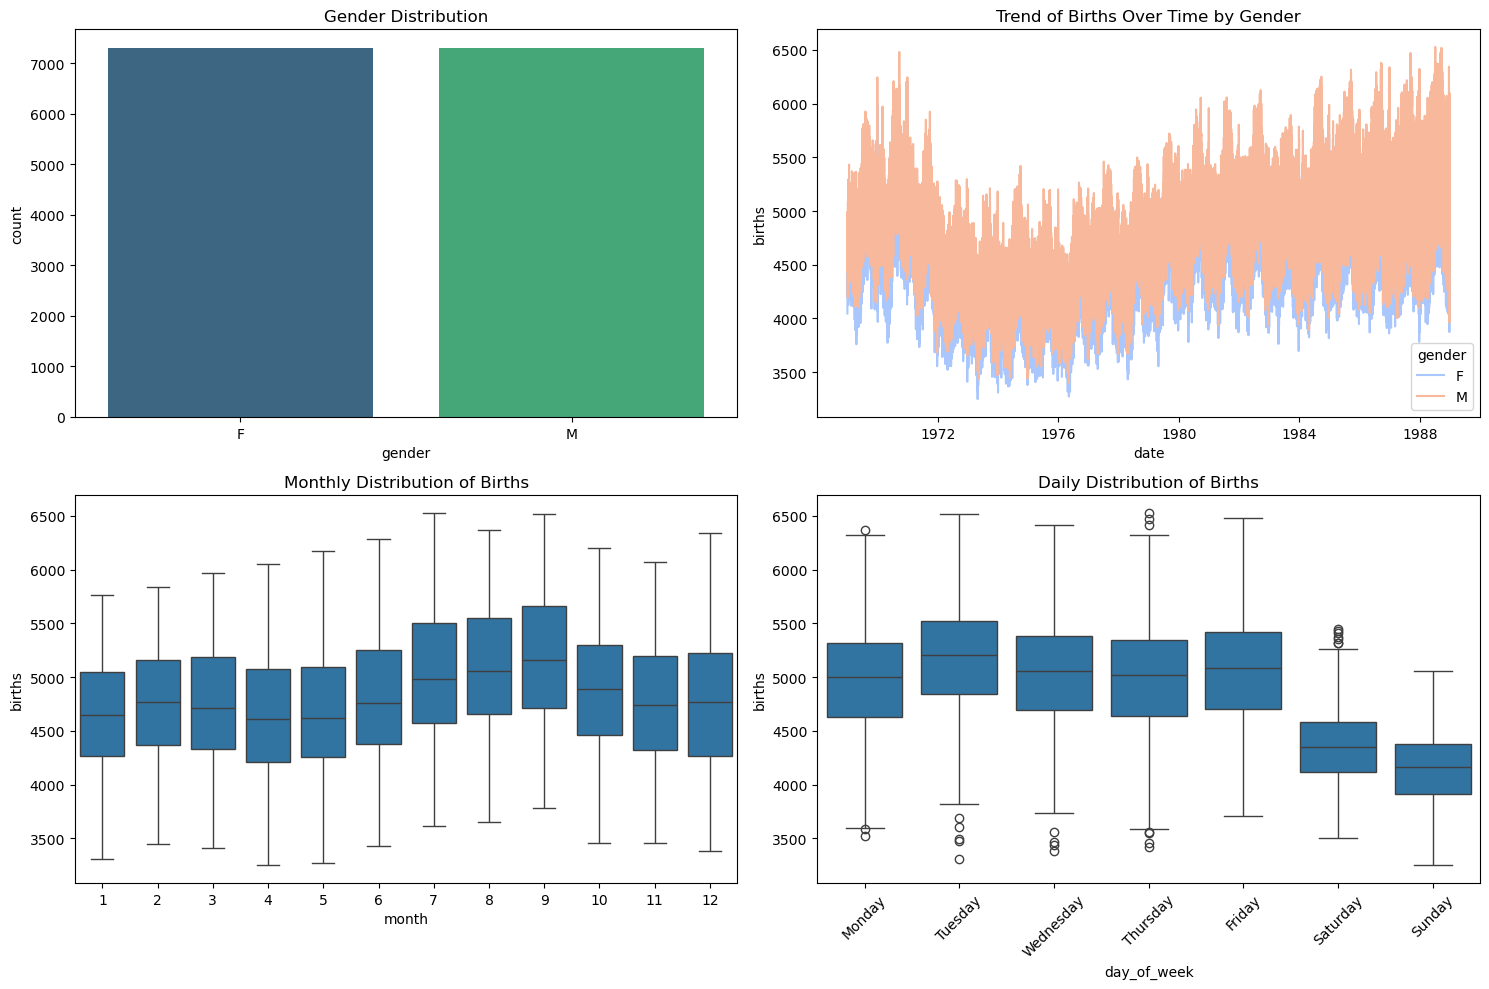

C:\Users\nagsn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nagsn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nagsn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nagsn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

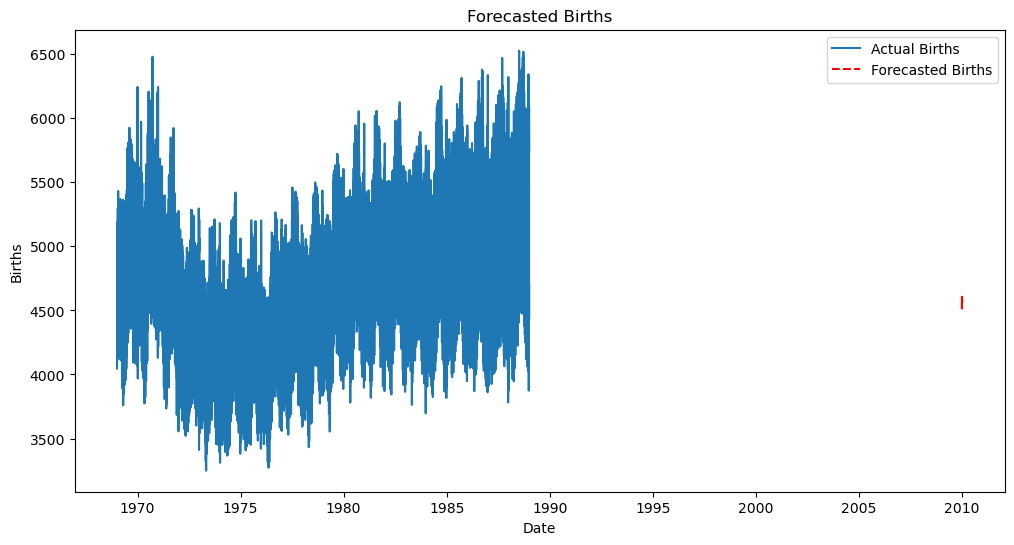

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Load and clean data
data = pd.read_csv('births.csv')
data.dropna(inplace=True)

data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)

# Convert to datetime
data['date'] = pd.to_datetime(data[['year', 'month', 'day']], errors='coerce')

# Drop rows where conversion failed, if any
data.dropna(subset=['date'], inplace=True)

# Further cleaning
data['gender'] = data['gender'].str.strip().str.capitalize()
data.drop(columns=['year', 'month', 'day'], inplace=True)

# EDA
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='gender', palette='viridis')
plt.title('Gender Distribution')

plt.subplot(2, 2, 2)
sns.lineplot(data=data, x='date', y='births', hue='gender', palette='coolwarm')
plt.title('Trend of Births Over Time by Gender')

plt.subplot(2, 2, 3)
data['month'] = data['date'].dt.month
sns.boxplot(data=data, x='month', y='births')
plt.title('Monthly Distribution of Births')

plt.subplot(2, 2, 4)
data['day_of_week'] = data['date'].dt.day_name()
sns.boxplot(data=data, x='day_of_week', y='births', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Distribution of Births')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time Series Forecasting
data = data.sort_values(by='date')
births_series = data.set_index('date')['births']
model = ARIMA(births_series, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(births_series, label='Actual Births')
plt.plot(forecast, label='Forecasted Births', linestyle='--', color='red')
plt.title('Forecasted Births')
plt.xlabel('Date')
plt.ylabel('Births')
plt.legend()
plt.show()
